# Lead Scoring Case Study

#### Performed by: Monica Fatwani & Rohit Lal

In [1]:
# Suppress Warnings
import warnings
warnings.filterwarnings("ignore")

# importing required packages
import numpy as np
import pandas as pd

# Importing plotting libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Importing stats model library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing sklearn library
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

## Loading the data

In [2]:
# Reading the data file.
leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Inspecting the Data

In [3]:
# Checking the shape of data
leads.shape

(9240, 37)

In [4]:
# Inspecting the data types of columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Checking the summary statistics numeric variables
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

##### Replacing the 'Select' column with NaN values, since it signifies missing data (i.e, no option is selected)

In [6]:
#Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [7]:
# Checking for single valued columns.
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Dropping single-valued columns, since they won't contribute to our analysis.

In [8]:
leads.drop([
    'Magazine',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque',
],axis=1, inplace=True)

### Check percentage of missing values

In [9]:
def print_null_statistics():
    # Checking for count and percentage of null values in all columns of the dataframe.
    total_null = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])
    percentage_null = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                              ,columns=['Percentage'])
    return pd.concat([total_null, percentage_null], axis = 1)

In [10]:
print_null_statistics()

,Total,Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


#### Dropping columns with high percentage of missing values(> 45%)

In [11]:
leads.drop([
    'How did you hear about X Education',
    'Lead Profile',
    "Lead Quality",
    'Asymmetrique Profile Score',
    'Asymmetrique Activity Score',
    'Asymmetrique Profile Index',
    'Asymmetrique Activity Index', 
    ], axis=1, inplace=True)

In [12]:
leads.shape

(9240, 25)

#### Dropping categorical columns that are highly skewed

In [13]:
leads["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [14]:
leads["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [15]:
leads["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [16]:
leads.drop([
    "Through Recommendations", 
    "Digital Advertisement", 
    "Newspaper", 
    "X Education Forums", 
    "Newspaper Article", 
    "Search", 
    "What matters most to you in choosing a course"
], axis=1, inplace=True)

In [17]:
leads.shape

(9240, 18)

In [18]:
print_null_statistics()

,Total,Percentage
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29
What is your current occupation,2690,29.11
Country,2461,26.63
Page Views Per Visit,137,1.48
TotalVisits,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Last Notable Activity,0,0.00


###  Impute columns with less number of missing values

In [19]:
# Categorizing non-Indian countries to a single category 'Outside India'.
leads['Country'] = leads['Country'].fillna('Not Provided')
leads['Country'] = leads['Country'].apply(lambda x: x if x in ('India', 'Not Provided') else 'Outside India')
leads['Country'].value_counts()

India            6492
Not Provided     2461
Outside India     287
Name: Country, dtype: int64

In [20]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# So we will replace NaN values here with 'Not Specified'
leads['Specialization'] = leads['Specialization'].fillna('Not Specified') 

In [21]:
#imputing null values in 'What is your current occupation' column with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')

In [22]:
#replacing null values in Tags with "Not Specified"
leads['Tags'] = leads['Tags'].fillna('Not Specified')

In [23]:
# Imputing null values in City column with Not Specified
leads['City'] = leads['City'].replace(np.nan,'Not Specified')

In [24]:
print_null_statistics()

,Total,Percentage
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Last Notable Activity,0,0.00
Lead Number,0,0.00
Lead Origin,0,0.00
Do Not Email,0,0.00
Do Not Call,0,0.00
Converted,0,0.00


In [25]:
#checking value counts of Lead Source column
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
testone                 1
NC_EDM                  1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64

In [26]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [27]:
print_null_statistics()

,Total,Percentage
Last Notable Activity,0,0.0
A free copy of Mastering The Interview,0,0.0
Lead Number,0,0.0
Lead Origin,0,0.0
Lead Source,0,0.0
Do Not Email,0,0.0
Do Not Call,0,0.0
Converted,0,0.0
TotalVisits,0,0.0
Total Time Spent on Website,0,0.0


# EDA

In [28]:
def draw_count_plot(data, data_col, hue_col, orient='h'):
    plt.figure(figsize=(15, 8))
    if orient == 'h':
        sns.countplot(x=data_col, hue=hue_col, data=data)
    else:
        sns.countplot(y=data_col, hue=hue_col, data=data)
    plt.show

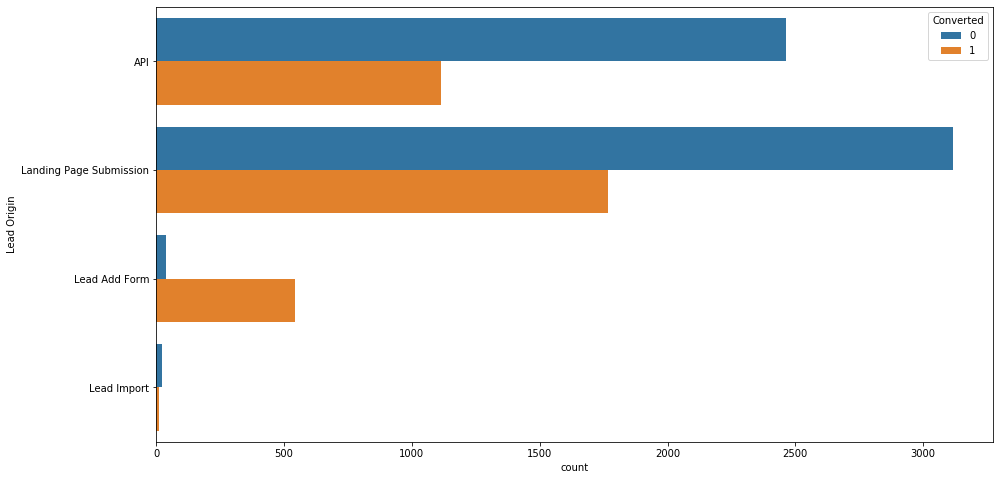

In [29]:
draw_count_plot(leads, 'Lead Origin', 'Converted', orient='v')

## Insights::
- API and Landing Page Submission has 40-50% conversion rate, count of the leads are also high.
- Lead Add Form has high conversion rate but count of lead are very low.
- Lead Import are very less in count.

 We must focus on Lead Add Form leads and to improve lead conversion of API and Landing Page Submission.

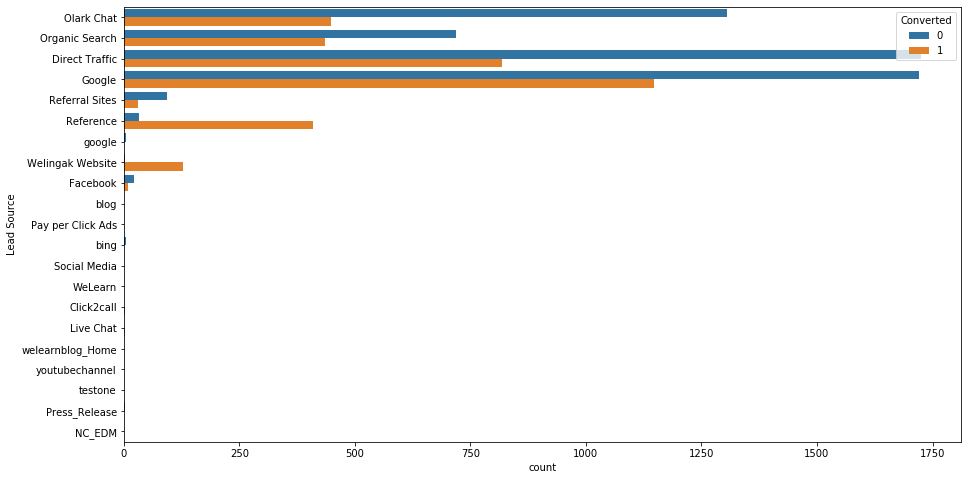

In [30]:
draw_count_plot(leads, 'Lead Source', 'Converted', orient='v')

In [31]:
#combining low frequency values
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace([
    'blog','Pay per Click Ads','bing','Social Media','WeLearn',
    'Click2call','Live Chat','Press_Release',
    'youtubechannel','welearnblog_Home', 'testone','NC_EDM'] ,
    'Others')

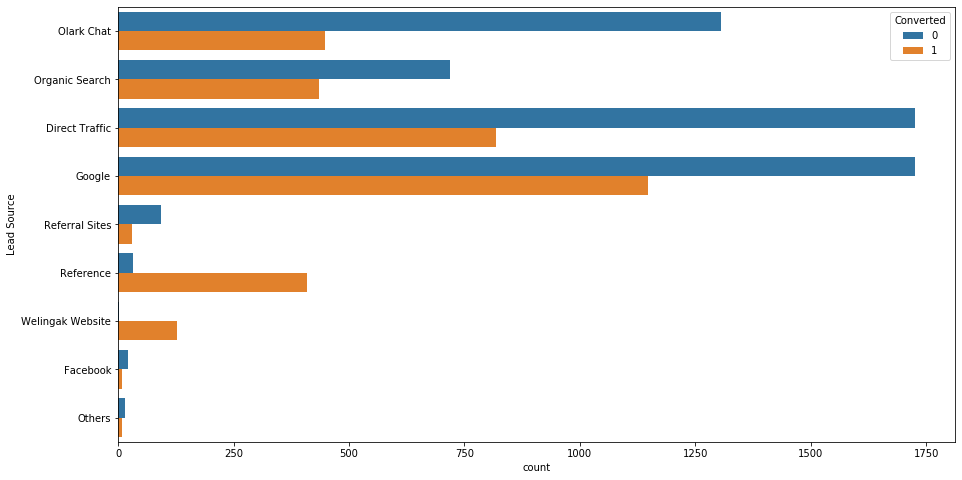

In [32]:
draw_count_plot(leads, 'Lead Source', 'Converted', orient='v')

## Insights::
- Google and Direct Traffic generates maximum number of leads.
- Conversion of Reference and Wellngak Website leads are high so we must focus on them.

To improve overall lead conversion rate, focus should be on improving lead converion of Olark chat, Organic Search, Direct Traffic, and Google leads and generate more leads from Reference and Wellngak Website.

### Do Not Email and Do Not Call

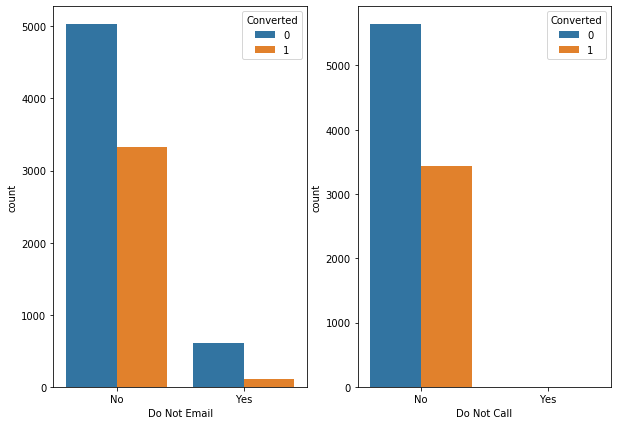

In [33]:
fig, axs = plt.subplots(1,2,figsize = (10,7))
plt.subplot(1,2,1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads)
plt.subplot(1,2,2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads)

## Insights::
-We have quite similar data for both.  

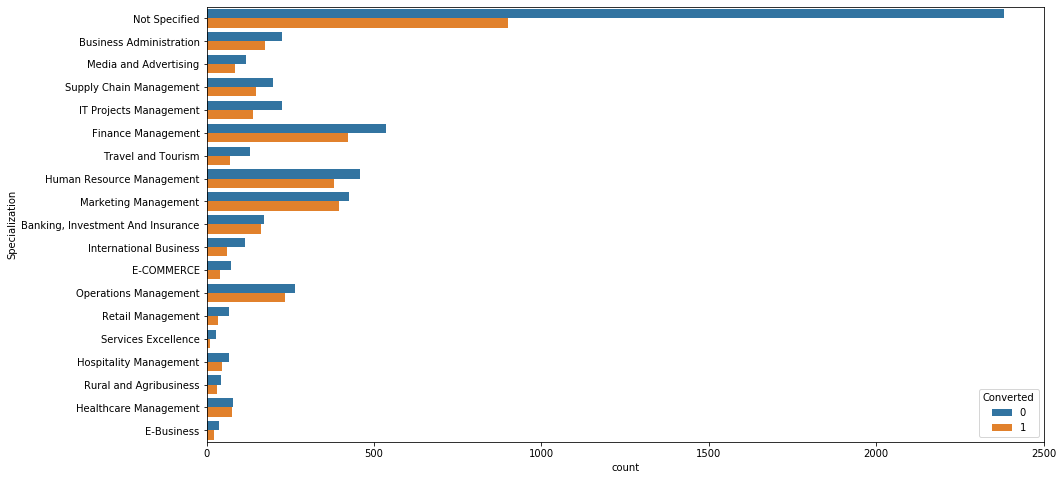

In [34]:
draw_count_plot(leads, 'Specialization', 'Converted', orient='v')

## Insights::
- `Finance Management`, `Human Resource Management`, `Marketing Management` are some popular specialization among applicants.
- Good number of applicant have not provided the `Specialization`

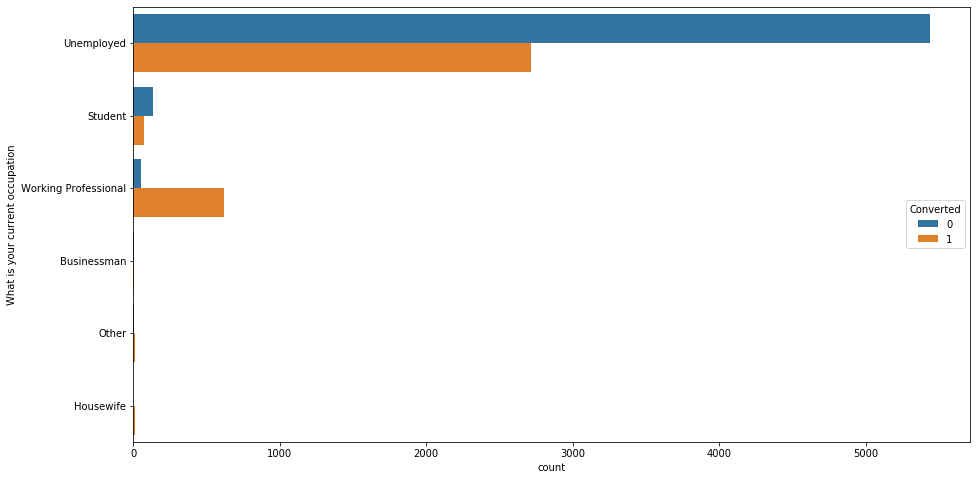

In [35]:
draw_count_plot(leads, 'What is your current occupation', 'Converted', orient='v')

## Insights::
- `Working Professionals` have high Conversion rate.
- Large number of applicants are from `Unemployed` category.

### Ratio of Converted Leads to not Converted

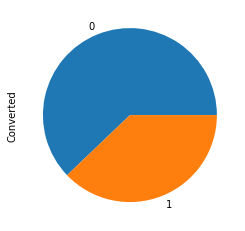

In [36]:
leads.Converted.value_counts().plot.pie()

## Analyzing Numerical Variables

In [37]:
def plot_boxplot(df, x_col):
    plt.figure(figsize = (12, 3))
    plt.title("Boxplot for {}".format(x_col))
    sns.boxplot(data=df, x=x_col)
    plt.show()

In [38]:
def plot_boxplot_two_vars(df, x_col, y_col):
    plt.figure(figsize = (12, 5))
    plt.title("Boxplot for {} v/s {}".format(x_col, y_col))
    sns.boxplot(data=df, x=x_col, y=y_col, orient='h')
    plt.show()

### Total Visits

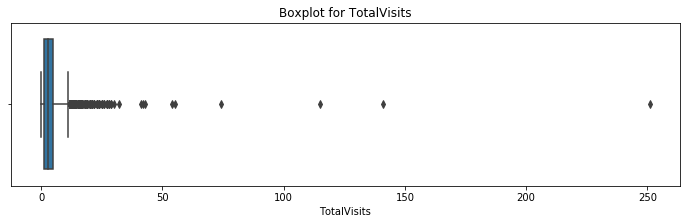

In [39]:
plot_boxplot(leads, 'TotalVisits')

In [40]:
leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [41]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = leads['TotalVisits'].quantile([0.95]).values
leads["TotalVisits"]=leads["TotalVisits"].apply(lambda x:percentiles if x>percentiles else x)

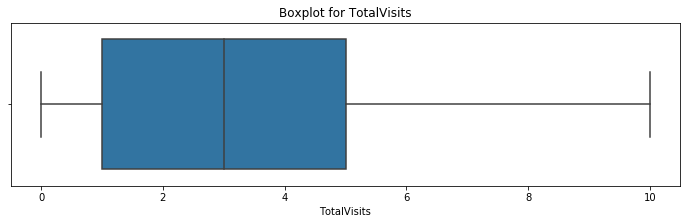

In [42]:
plot_boxplot(leads, 'TotalVisits')

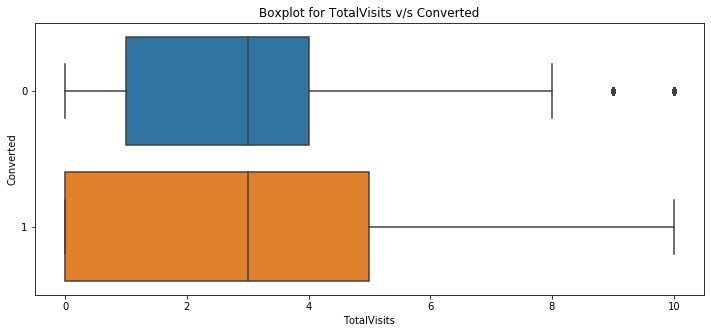

In [43]:
plot_boxplot_two_vars(leads, 'TotalVisits', 'Converted')

## Insights::
- Median for converted and not converted leads are the same.

Nothng conclusive can be said on the basis of Total Visits.

### Total Time Spent on Website               

In [44]:
leads['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

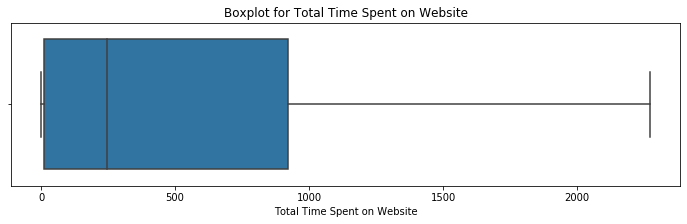

In [45]:
plot_boxplot(leads, 'Total Time Spent on Website')

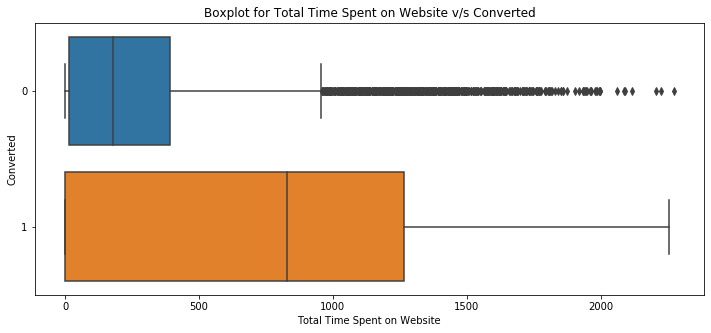

In [46]:
plot_boxplot_two_vars(leads, 'Total Time Spent on Website', 'Converted')

## Insights::
- Leads spending more time on the weblise are more likely to be converted.

Website should be made more engaging to make leads spend more time.

### Page views per visit

In [47]:
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

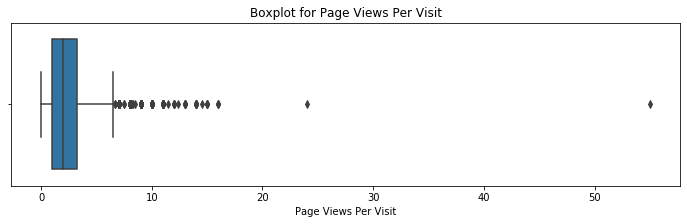

In [48]:
plot_boxplot(leads, 'Page Views Per Visit')

In [49]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = leads['Page Views Per Visit'].quantile([0.95]).values
leads["Page Views Per Visit"]=leads["Page Views Per Visit"].apply(lambda x:percentiles if x>percentiles else x)

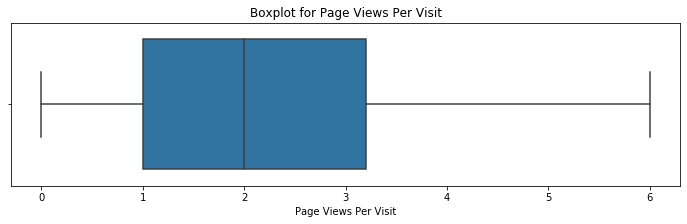

In [50]:
plot_boxplot(leads, 'Page Views Per Visit')

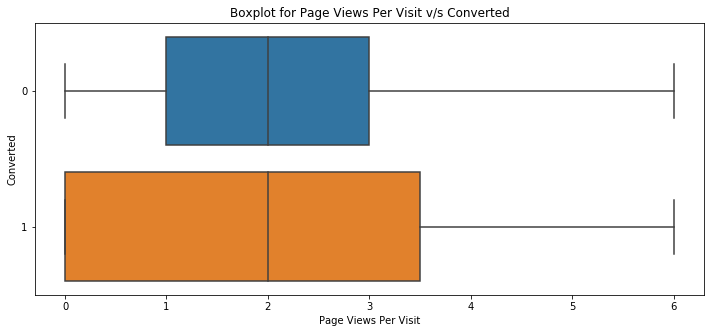

In [51]:
plot_boxplot_two_vars(leads, 'Page Views Per Visit', 'Converted')

### Insights::
- Median for converted and unconverted leads is the same.

Nothing can be said specifically for lead conversion from Page Views Per Visit

### Last Activity

In [52]:
leads['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

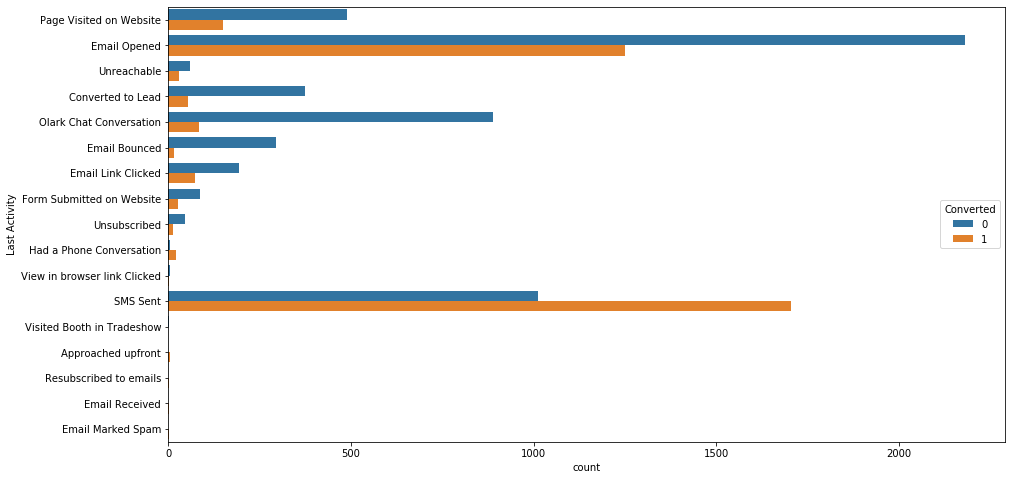

In [53]:
draw_count_plot(leads, 'Last Activity', 'Converted' ,orient='v')

In [54]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace([
    'Had a Phone Conversation', 'View in browser link Clicked', 
    'Visited Booth in Tradeshow', 'Approached upfront',
    'Resubscribed to emails','Email Received', 'Email Marked Spam'
], 'Other_Activity')

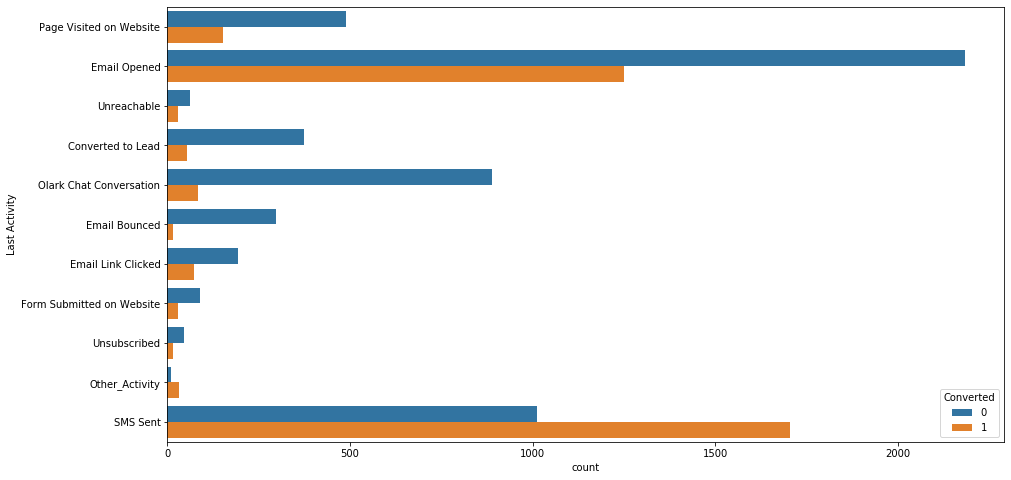

In [55]:
draw_count_plot(leads, 'Last Activity', 'Converted' ,orient='v')

### Insights::
- Most of the lead have their Email opened as their last activity.
- Conversion rate for leads with last activity as SMS Sent is almost 60%.

### Country

In [56]:
leads.Country.describe()

count      9074
unique        3
top       India
freq       6491
Name: Country, dtype: object

### Insights::
- Most values are 'India' no such inference can be drawn

### Specialization

In [57]:
leads.Specialization.describe()

count              9074
unique               19
top       Not Specified
freq               3282
Name: Specialization, dtype: object

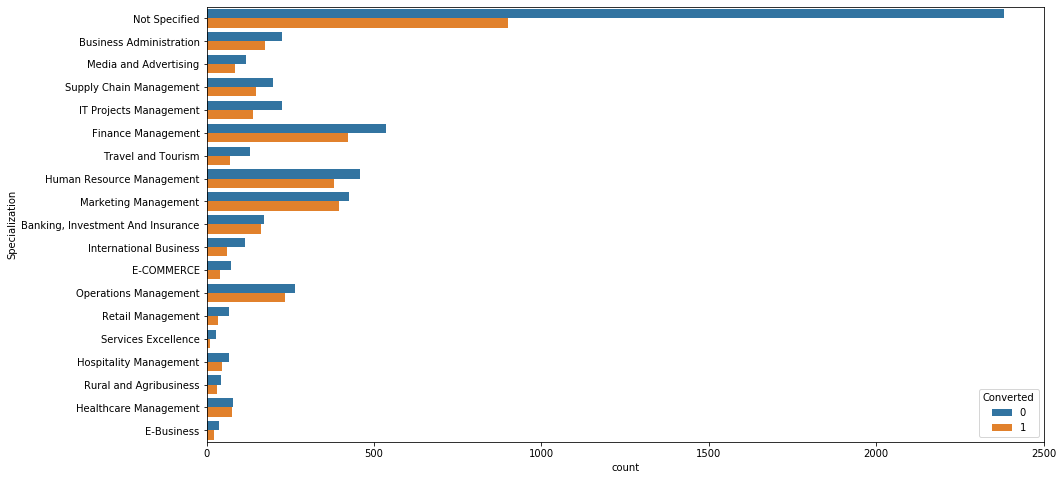

In [58]:
draw_count_plot(leads, 'Specialization', 'Converted', orient='v')

### Insights::
- Focus should be more on the Specialization with high conversion rate. Heathcare Management, Marketing Management, Banking Investment and Insurance.

### What is your current occupation

In [59]:
leads['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

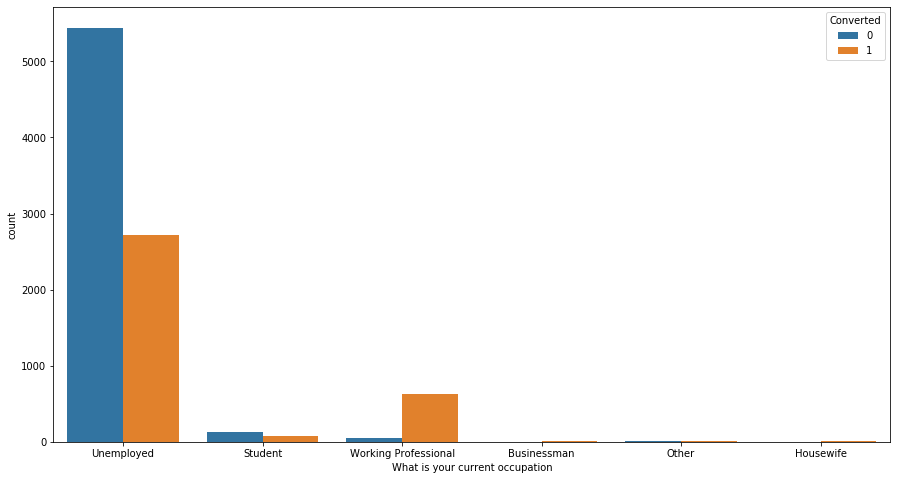

In [60]:
draw_count_plot(leads, 'What is your current occupation', 'Converted')

### Insights:

- Working Professional should be focused as they have higher chance of joining it.
- Unemployed leads are the most in numbers but has around 30-35% conversion rate.


### Tags

In [61]:
leads.Tags.describe()

count              9074
unique               27
top       Not Specified
freq               3327
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

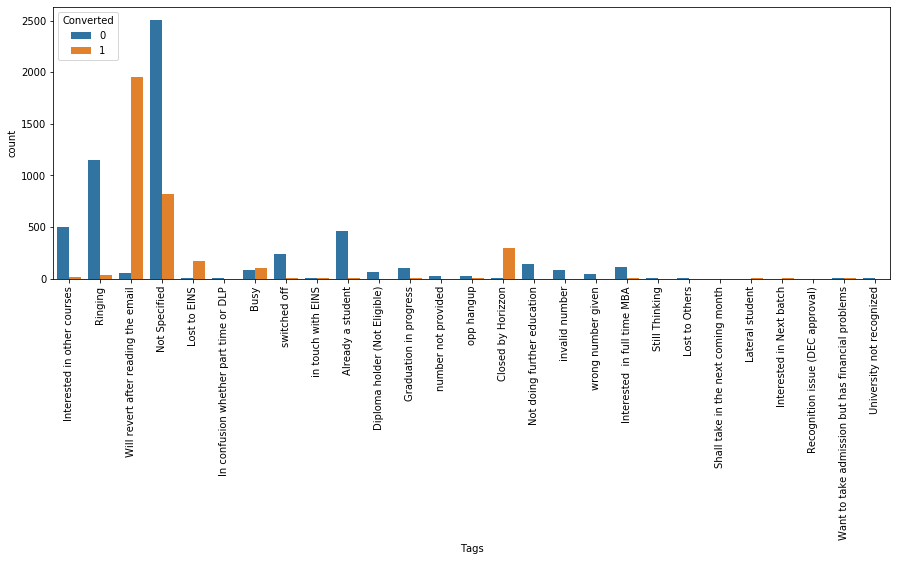

In [62]:
plt.figure(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [63]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Tags'] = leads['Tags'].replace([
    'In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
    'Graduation in progress','number not provided', 'opp hangup','Still Thinking',
    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
    'University not recognized'], 'Other_Tags')

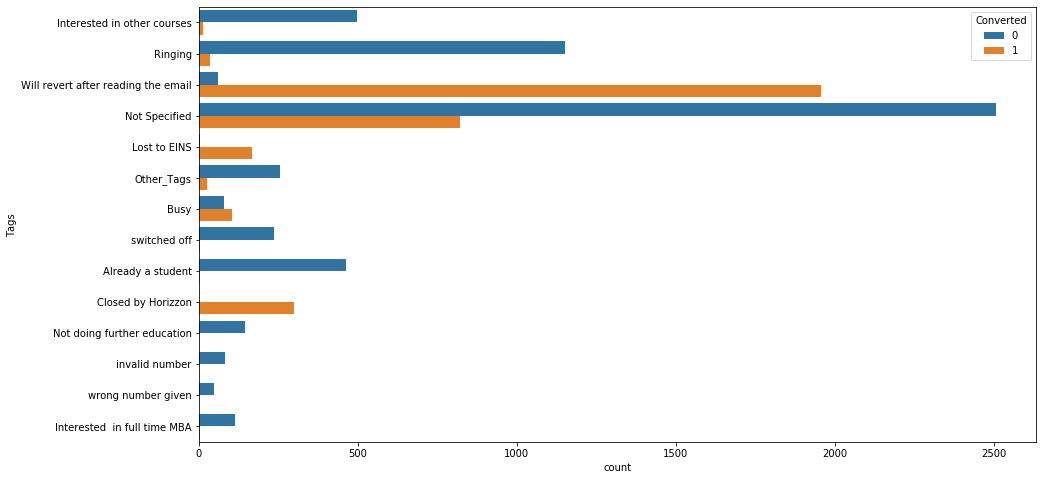

In [64]:
draw_count_plot(leads, 'Tags', 'Converted', orient='v')

### Insights::
- Leads with Will revert after reading the email, Lost to EINS, Busy and Closed by Horizon has high conversion rate.

### City

In [65]:
leads.City.describe()

count              9074
unique                7
top       Not Specified
freq               3575
Name: City, dtype: object

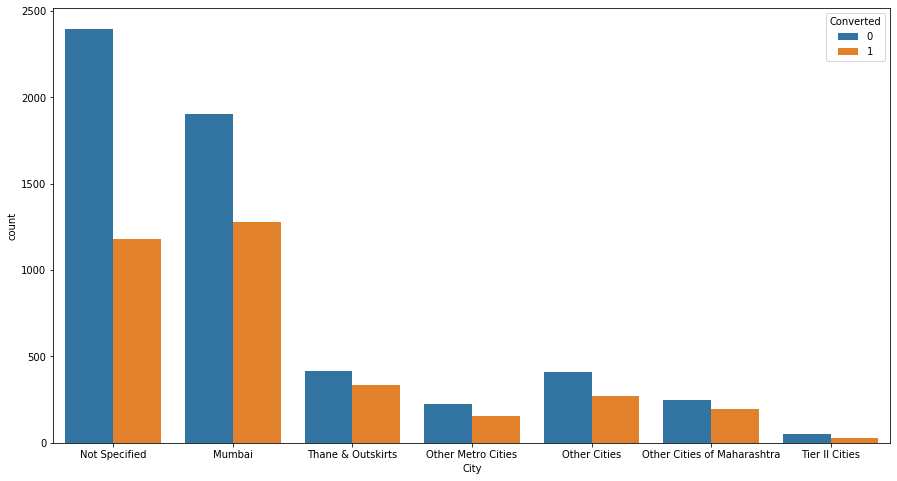

In [66]:
draw_count_plot(leads, 'City', 'Converted')

### Insights::
- Most leads are from mumbai with around 30% conversion rate.

### A free copy of Mastering The Interview

In [67]:
leads["A free copy of Mastering The Interview"].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

Insights::
- Most entries are 'No'. No Inference can be drawn with this parameter.

### Last Notable Activity

In [68]:
leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

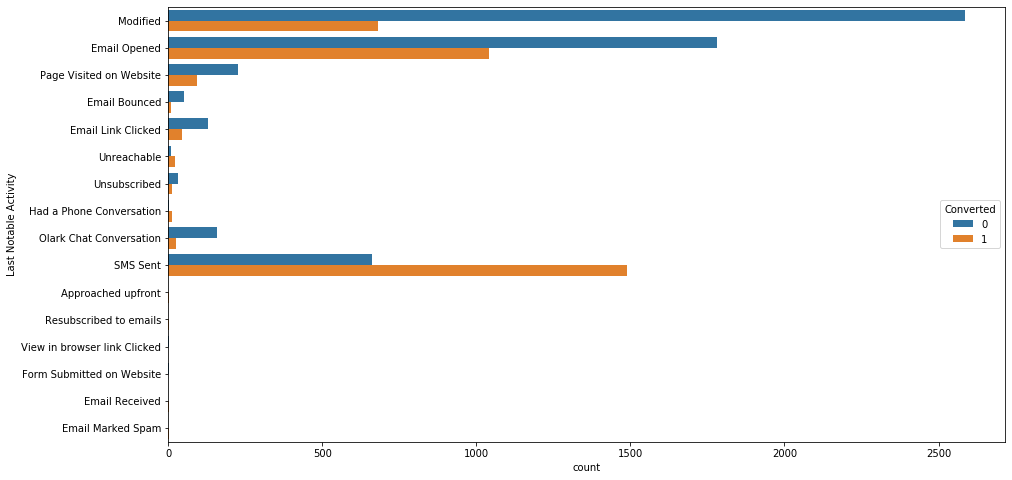

In [69]:
draw_count_plot(leads, "Last Notable Activity", "Converted", orient='v')

In [70]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'Tags',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [71]:
## Results
# Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis.
leads.drop([
    'Lead Number', 
    'A free copy of Mastering The Interview',
    'Country', 'Tags'
], axis=1, inplace=True)

## Data Preparation

In [72]:
# Converting binary variables (Yes/No) to 1/0
varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables
leads[varlist] = leads[varlist].apply(binary_map)

In [73]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Not Specified,Unemployed,Not Specified,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5,674,2.5,Email Opened,Not Specified,Unemployed,Not Specified,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,Business Administration,Student,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,Media and Advertising,Unemployed,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,Not Specified,Unemployed,Mumbai,Modified


 ### For categorical variables with multiple levels, create dummy features 

In [74]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[[
    'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
    'City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [75]:
# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [76]:
leads = leads.drop([
    'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
    'City','Last Notable Activity'], axis = 1)

In [77]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2,1532,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1,305,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2,1428,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [78]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1532,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,305,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2,1428,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [79]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [80]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [81]:
# Using standard scaler
scaler = StandardScaler()

# Scaling numerical variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [82]:
# Checking the Churn Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

## Model Building

In [83]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.0
Date:                Mon, 26 Oct 2020   Deviance:                       5061.9
Time:                        18:12:35   Pearson chi2:                 6.42e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.7464   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.5553      0.226     -6.872      0.000      -1.999      -1.112
Do Not Call                                             22.3706   5.18e+04      0.000      1.000   -1.02e+05    1.02e+05
TotalVisits                                              0.2831      0.057      4.941      0.000       0.171       0.395
Total Time Spent on Website                              1.1096      0.042     26.637      0.000       1.028       1.191
Page Views Per Visit                                    -0.3264      0.064     -5.117      0.000      -0.451      -0.201
Lead Origin_Landing Page Submission                     -1.0987      0.150     -7.313      0.000      -1.393      -0.804
Lead Origin_Lead Add Form                                0.9159      0.998      0.918      0.359      -1.040       2.872
Lead Origin_Lead Import                                 23.8297   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Facebook                                   -23.0153   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                       0.3341      0.098      3.399      0.001       0.141       0.527
Lead Source_Olark Chat                                   1.2918      0.164      7.883      0.000       0.971       1.613
Lead Source_Organic Search                               0.1760      0.134      1.314      0.189      -0.087       0.438
Lead Source_Others                                       0.9277      0.657      1.411      0.158      -0.361       2.216
Lead Source_Reference                                    2.5624      1.023      2.504      0.012       0.557       4.568
Lead Source_Referral Sites                               0.0279      0.359      0.078      0.938      -0.676       0.732
Lead Source_Welingak Website                             5.1558      1.236      4.171      0.000       2.733       7.578
Last Activity_Email Bounced                             -0.2322      0.681     -0.341      0.733      -1.567       1.102
Last Activity_Email Link Clicked                         0.7199      0.432      1.666      0.096      -0.127       1.567
Last Activity_Email Opened                               0.9354      0.255      3.670      0.000       0.436       1.435
Last Activity_Form Submitted on Website                  0.3181      0.404      0.788      0.431      -0.473       1.109
Last Activity_Olark Chat Conversation                   -0.3563      0.288     -1.238      0.216      -0.920       0.208
Last Activity_Other_Activity                             2

## Feature Selection Using RFE

In [84]:
# Using logistic regression model
logreg = LogisticRegression()

# running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False])

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 15),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Source_Facebook', False, 41),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 40),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', False, 2),
 ('Lead Source_Referral Sites', False, 54),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 26),
 ('Last Activity_Email Link Clicked', False, 18),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 45),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 17),
 ('Last Activity_SMS Sent', True, 

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Not Specified',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

## Assessing the model with StatsModels

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.2
Date:                Mon, 26 Oct 2020   Deviance:                       5194.5
Time:                        18:12:41   Pearson chi2:                 6.50e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0989      0.126     -0.783      0.433      -0.346       0.149
Do Not Email                                            -1.6702      0.190     -8.772      0.000      -2.043      -1.297
Total Time Spent on Website                              1.0995      0.040     27.179      0.000       1.020       1.179
Lead Origin_Landing Page Submission                     -1.1675      0.128     -9.118      0.000      -1.418      -0.917
Lead Origin_Lead Add Form                                3.2673      0.235     13.878      0.000       2.806       3.729
Lead Source_Olark Chat                                   1.0957      0.123      8.910      0.000       0.855       1.337
Lead Source_Welingak Website                             2.5967      0.756      3.434      0.001       1.115       4.079
Last Activity_Olark Chat Conversation                   -0.9423      0.171     -5.495      0.000      -1.278      -0.606
Last Activity_Other_Activity                             2.2060      0.462      4.770      0.000       1.300       3.112
Last Activity_SMS Sent                                   1.3297      0.075     17.642      0.000       1.182       1.477
Last Activity_Unsubscribed                               1.3789      0.482      2.860      0.004       0.434       2.324
Specialization_Not Specified                            -1.1793      0.126     -9.377      0.000      -1.426      -0.933
What is your current occupation_Housewife               22.7372   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Working Professional     2.6155      0.194     13.448      0.000       2.234       2.997
Last Notable Activity_Modified                          -0.8781      0.081    -10.784      0.000      -1.038      -0.718
Last Notable Activity_Unreachable                        1.5571      0.474      3.286      0.001       0.628       2.486
========================================================================================================================
"""

- What is your current occupation_Housewife has high P value, hence dropping it

In [89]:
col1 = col.drop('What is your current occupation_Housewife',1)
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [90]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2601.4
Date:                Mon, 26 Oct 2020   Deviance:                       5202.8
Time:                        18:12:41   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0913      0.126     -0.724      0.469      -0.339       0.156
Do Not Email                                            -1.6724      0.190     -8.783      0.000      -2.046      -1.299
Total Time Spent on Website                              1.0988      0.040     27.190      0.000       1.020       1.178
Lead Origin_Landing Page Submission                     -1.1678      0.128     -9.130      0.000      -1.419      -0.917
Lead Origin_Lead Add Form                                3.2825      0.235     13.959      0.000       2.822       3.743
Lead Source_Olark Chat                                   1.0942      0.123      8.901      0.000       0.853       1.335
Lead Source_Welingak Website                             2.5816      0.756      3.414      0.001       1.100       4.063
Last Activity_Olark Chat Conversation                   -0.9433      0.171     -5.501      0.000      -1.279      -0.607
Last Activity_Other_Activity                             2.2026      0.463      4.761      0.000       1.296       3.109
Last Activity_SMS Sent                                   1.3246      0.075     17.585      0.000       1.177       1.472
Last Activity_Unsubscribed                               1.3761      0.482      2.854      0.004       0.431       2.321
Specialization_Not Specified                            -1.1841      0.126     -9.422      0.000      -1.430      -0.938
What is your current occupation_Working Professional     2.6109      0.194     13.424      0.000       2.230       2.992
Last Notable Activity_Modified                          -0.8810      0.081    -10.827      0.000      -1.041      -0.722
Last Notable Activity_Unreachable                        1.5512      0.474      3.274      0.001       0.623       2.480
========================================================================================================================
"""

In [91]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192284
1012    0.109279
9226    0.328692
4750    0.866575
7987    0.802380
1281    0.745109
2880    0.097308
4971    0.965280
7536    0.852204
1248    0.773092
dtype: float64

In [92]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1922845 , 0.10927935, 0.32869167, 0.86657536, 0.80238043,
       0.74510885, 0.09730762, 0.96527982, 0.85220391, 0.77309156])

## Creating a dataframe with the actual churn flag and the predicted probabilities

In [93]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192284,3009
1,0,0.109279,1012
2,0,0.328692,9226
3,1,0.866575,4750
4,1,0.802380,7987


## Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [94]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192284,3009,0
1,0,0.109279,1012,0
2,0,0.328692,9226,0
3,1,0.866575,4750,1
4,1,0.802380,7987,1


In [95]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 708 1738]]


In [96]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8182963312864115


### Checking VIFs

In [97]:
# Check for the VIF values of the feature variables. 

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Specialization_Not Specified,2.17
4,Lead Source_Olark Chat,2.03
13,Last Notable Activity_Unreachable,1.79
2,Lead Origin_Landing Page Submission,1.71
3,Lead Origin_Lead Add Form,1.62
6,Last Activity_Olark Chat Conversation,1.59
8,Last Activity_SMS Sent,1.57
5,Lead Source_Welingak Website,1.37
1,Total Time Spent on Website,1.29
0,Do Not Email,1.21


- VIF values looks good and are within range.

## Creating a dataframe with the actual churn flag and the predicted probabilities

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.192284,3009
1,0,0.109279,1012
2,0,0.328692,9226
3,1,0.866575,4750
4,1,0.802380,7987


## Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [100]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192284,3009,0
1,0,0.109279,1012,0
2,0,0.328692,9226,0
3,1,0.866575,4750,1
4,1,0.802380,7987,1


In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 708 1738]]


In [102]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8182963312864115


- Accuracy score of the train set is 81%

## Metrics beyond simply accuracy

In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7105478331970564

- 70% of the leads converted are correct in train dataset

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.885787451984635

In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.7957875457875457


In [107]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.11421254801536491


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.830093592512599


## Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

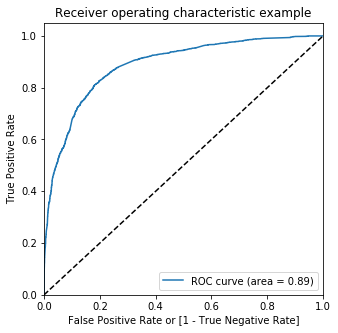

In [111]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

####  Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192284,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.109279,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.328692,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.866575,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.802380,7987,1,1,1,1,1,1,1,1,1,1,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.593292  0.972200  0.355954
0.2   0.2  0.749646  0.915781  0.645583
0.3   0.3  0.802078  0.851594  0.771063
0.4   0.4  0.816564  0.776778  0.841485
0.5   0.5  0.818296  0.710548  0.885787
0.6   0.6  0.798457  0.603025  0.920871
0.7   0.7  0.787120  0.530253  0.948015
0.8   0.8  0.760825  0.422322  0.972855
0.9   0.9  0.722563  0.299673  0.987452


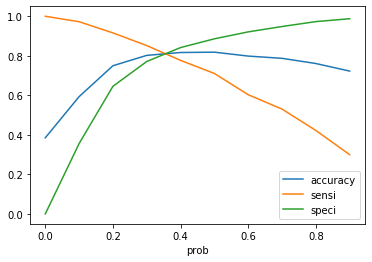

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, the optimum point for cutoff probability lies anywhere between 0.3 and 0.4

In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.192284,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.109279,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.328692,9226,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.866575,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.802380,7987,1,1,1,1,1,1,1,1,1,1,0,1


## Assigning Lead Score

In [116]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192284,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.109279,1012,0,1,1,0,0,0,0,0,0,0,0,0,11
2,0,0.328692,9226,0,1,1,1,1,0,0,0,0,0,0,0,33
3,1,0.866575,4750,1,1,1,1,1,1,1,1,1,1,0,1,87
4,1,0.802380,7987,1,1,1,1,1,1,1,1,1,1,0,1,80


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8097937332703511

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8286999182338511

In [120]:
# Let us calculate specificity
TN / float(TN+FP)

0.7979513444302176

In [121]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20204865556978233


In [122]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7198153409090909


## Precision and Recall

In [123]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 708, 1738]], dtype=int64)

In [124]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7957875457875457

In [125]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7105478331970564

### Using sklearn utilities for the same

In [126]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.7957875457875457

In [127]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7105478331970564

### Precision and recall tradeoff

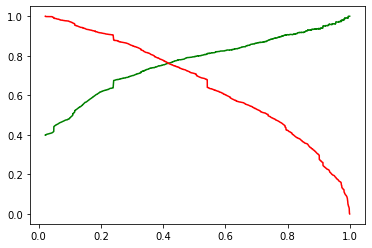

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [129]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [130]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Unreachable
3271,0,-0.600595,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,1,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,-0.888650,0,1,0,0,0,0,0,0,0,0,1,0
3830,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0


In [131]:
X_test_sm = sm.add_constant(X_test)

### Making predictions on the test set

In [132]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126162
1490    0.968492
7936    0.108840
4216    0.791457
3830    0.129549
1800    0.629147
6507    0.342776
4821    0.297196
4223    0.913350
4714    0.328692
dtype: float64

In [133]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3271,0.126162
1490,0.968492
7936,0.108840
4216,0.791457
3830,0.129549


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126162
1,1,1490,0.968492
2,0,7936,0.108840
3,1,4216,0.791457
4,0,3830,0.129549


In [138]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [139]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.126162
1,1,1490,0.968492
2,0,7936,0.108840
3,1,4216,0.791457
4,0,3830,0.129549


In [140]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,final_predicted
0,0,3271,0.126162,0
1,1,1490,0.968492,1
2,0,7936,0.108840,0
3,1,4216,0.791457,1
4,0,3830,0.129549,0


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8020565552699229

In [142]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1385,  349],
       [ 190,  799]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.80788675429727

- Sensitivity of test set is 80%

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.7987312572087658

##### In the final model evaluation on test set, we get:

- 80.20 % accuracy
- 80.78 % sensitivity
- 79.8 % specificity

# Conclusion

The variables / features that are most relevant in lead conversion are - 

- `Lead Origin` - `Lead Add Form` has high relevance in lead conversion.
- `Lead Source` - `Welingak Website` has high relevance in lead conversion.
- Leads with current occupation as `Working Professional`
- Total time spent on website.